<a href="https://colab.research.google.com/github/Mohini-Sharma-ds/Regression-prediction-model-/blob/main1/_Transport_prediction(regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member **     -MOHINI SHARMA


github link



# **Project Summary -**

Write the summary here within 500-600 words.


HEREBY ,I HAVE BEEN GIVEN THE DATASET OF BIKES DEMAND PREDICTION ON THE BASIS
OF VARIOUS VARIABLES GIVEN ,OUR GOAL HERE INVOLVES FOLLOWING:

1.  TO GO THROUGH EACH VARIABLE AND UNDERSTAND THE EFFECT OF THEM AGGREGATELY

2.  TO DRAW IMPORTANT CONCLUSIONS REGARDING VARIABLES AND THEIR DEPENDENCY.

3.  TO SHOW WORKINGS THROUGH VISUALIZATIONS.

4.  TO MAKE DATA MORE EXPLICIT.

5.  TO SHOW PREDICTION OF VARIABLES ,THROUGH TRAIN TEST  MODEL.

6.  TO USE LASSO ,RIDGE TO OVERCOME OVERFITTING IN MODELS.


# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/Mohini-Sharma-ds

# **Problem Statement**



**Write Problem Statement Here.**

HERE ALL WE HAVE TO DO IS TO UNDERSTAND AND GENERATE THE DEPENDENCY OF BIKE DEMANDS PER HOUR ON THE BASIS OF VARIOUS FACTORS LIKE TEMPERATURE,HUMIDITY.

SO WE WILL BE CO RELATING THE VARIABLES TO GENERATE OUR MODEL WHICH WILL FIT IN THE GIVEN DATASET TO GIVE GIVE AN APPROX IDEA WHILE FIXING THE OVERFITTING.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
dataset=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='unicode_escape')
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
pd.DataFrame.duplicated(dataset).value_counts()


False    8760
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Visualizing the missing values
dataset.isna().value_counts()

Date   Rented Bike Count  Hour   Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day
False  False              False  False            False        False             False             False                      False                    False         False          False    False    False              8760
dtype: int64

### What did you know about your dataset?

Answer Here

I KNOW THAT IN MY DATASET VARIOUS WEATHER CONDITIONS AND DAY SITUATIONS ARE GIVEN ,

1.  TEMPERATURE ,HUMIDITY ,SNOWFALL,SUNRISE, SEASON,VISIBILITY ETC AFFECT THE DEMEMND OF BIKES .

2.  PEOPLE PREFER MORE RIDINGS IN CERTAIN CONDITIONS.

3.  DEMANDS ALSO CHANGE ON THE BASIS OF WORKING DAT ASPECT

4.  HEREBY EACH VARIABLE GIVES SOE EXTEND OF DEPENDENCY ON NO.OF BIKES NEEDED.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()



Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

Answer Here

HOUR--- GIVES THE HOUR OF THE DAY WHICH MIGHT AFFECT THE BIKES DEMANDED AS PEOPLE PREFER TRAVELLING IN PARTICULAR HOURS

TEMP.---GIVES THE TENPERATURE OF THE TIME SO AS TO GET A LINK BETWEEN IT AND DEMAND.

HUMIDITY---GIVES THE HUMIDITY % IN  THE AIR WHICH MAY AFFECT THE DEMAND

WIND SPEED---GIVES THE SPEED IN M/S AS NOT EVERY WIND MOVEMENT IS RIDE PREFERABLE

VISISBILITY---GIVES THE VISIBILITY AS BLURY ENVT IS NOT RIDE PREFERABLE

SOLAR RADIATION-----GIVES THE SOLAR RADIATION  AS NOT EVERY RADIATION IS RIDE PREFERABLE

RAINFALL----GIVES THE RAINFALL IN MM AS NOT EVERY DEGREE IS RIDE PREFERABLE

SNOWFALL---GIVES THE SNOWFALL AS NOT EVERY DEGREE IS RIDE PREFERABLE


SEASON---GIVES THE PARTICULAR SEASON OF THE BIKE DEMAND AS IT MAY IMPACT CERTAINLY

HOLIDAY---IT SURELY AFFECTS THE DEMAND OF BIKES AS IN HOLIDAYS PEOPLE DONT HAVE TO MOVE FOR WORK BUT FOR TRAVELLING'

FUNCTIONING DAY---IT ALSO AFFCETS HUGELY AS IT GIVES WHETHER FUNCTIONALITY IS OPEN




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

dataset['unique_id']=range(1,8761)
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  unique_id  
0             Yes          1  
1             Yes          2  
2             Yes          3  
3             Yes          4  
4             Yes          5

### What all manipulations have you done and insights you found?

Answer Here.

in my dataset ,there was no any null value ,so we didnt need to drop any and everything looked fine ,except the unique column to to uniquely show every row ⁉

it will make counts of particular value easy and conclusions more accurate.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-74-d0b42e3d7ddd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Rented Bike Count'])


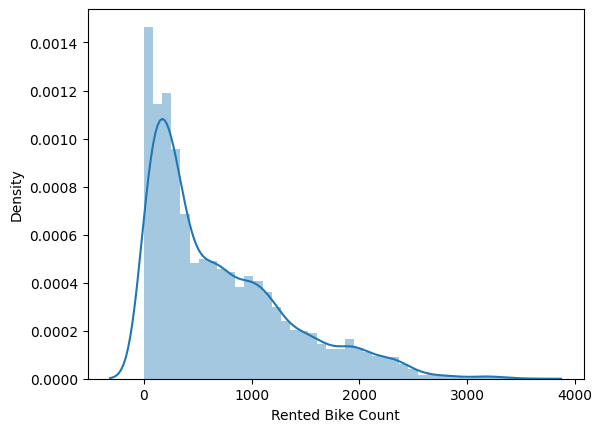

<ipython-input-74-d0b42e3d7ddd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

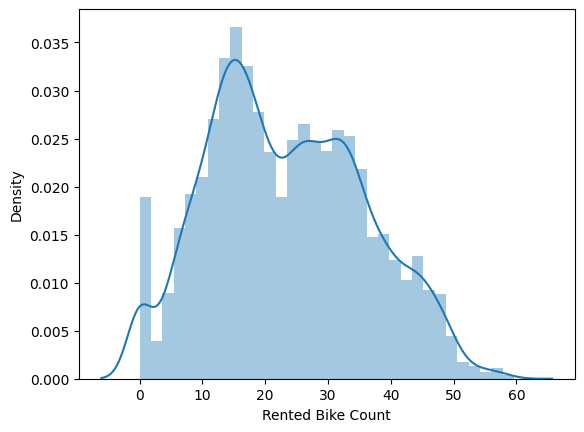

In [ ]:
# Chart - 1 visualization code
#plt.figure(figsize=(7,7))
dataset['Rented Bike Count'].skew()
#dataset['Rented Bike Count']=dataset['Rented Bike Count'].astype(float)
sns.distplot(dataset['Rented Bike Count'])
plt.show()
import numpy as np
target=np.sqrt(dataset['Rented Bike Count'])
sns.distplot(target)













##### 1. Why did you pick the specific chart?

Answer Here.

I picked up the particular density chart for given below various aspects:

1.  in order to clearly have the glimps of bike demand at various hours.

2.  in order to draw comparison easily and understand patterns.

3.  so as to draw meaningful insights by an eye view

4.  to make more understanding of trends.

5.  so as to make data more concluded and explicit.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

the insights found from the chart are as follows:

1.  there are various trends of demand in the chart.

2.  0-1000 bikes demand is most frequent

3.  1000-2000 bikes are somehow mediocre in demand

4.  2000-3000 are less in demand

5.  3000-4000 are too invisible and are rarely occured.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The positive insights drawn from the chart can be explained in the following manner:

1.  the most of the demand lies between500-1500,so it should be kept in mind and pervaisive availabilty should be there.

2.  the demand is very rare in3000-4000 range ,so the outliers can be kept aside .

3.  the most frequent demand of bikes should be most frequent availability of bikes.


4.  decisions on future should be made keeping in mind the demand supply

#### Chart - 2

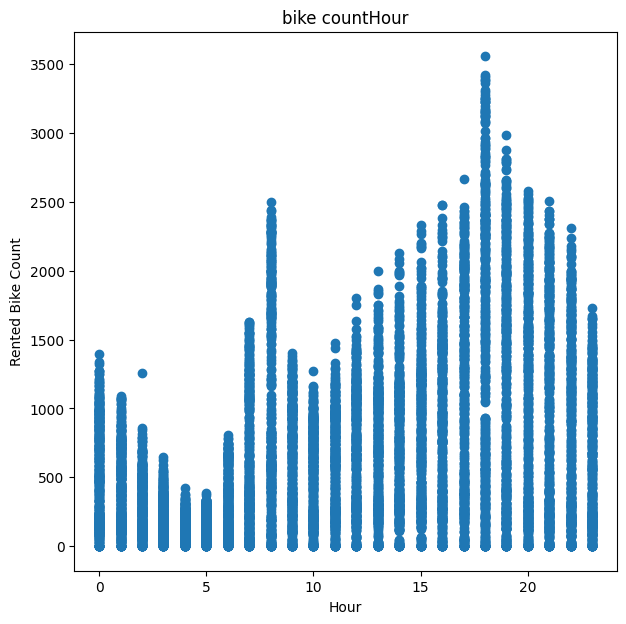

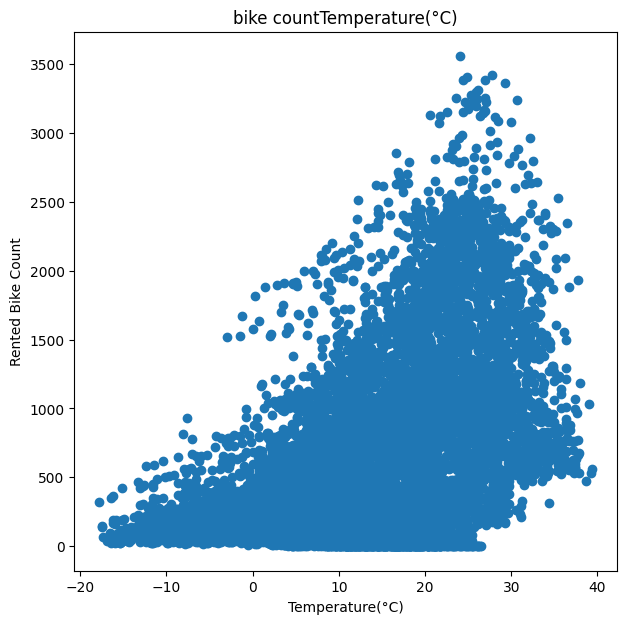

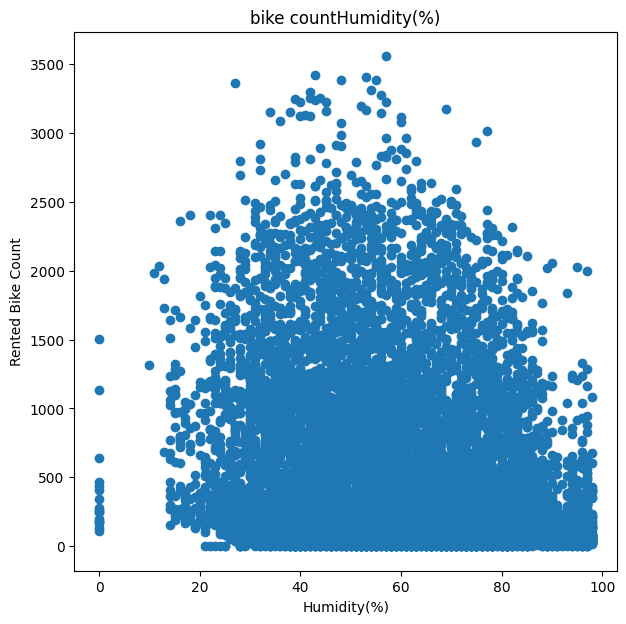

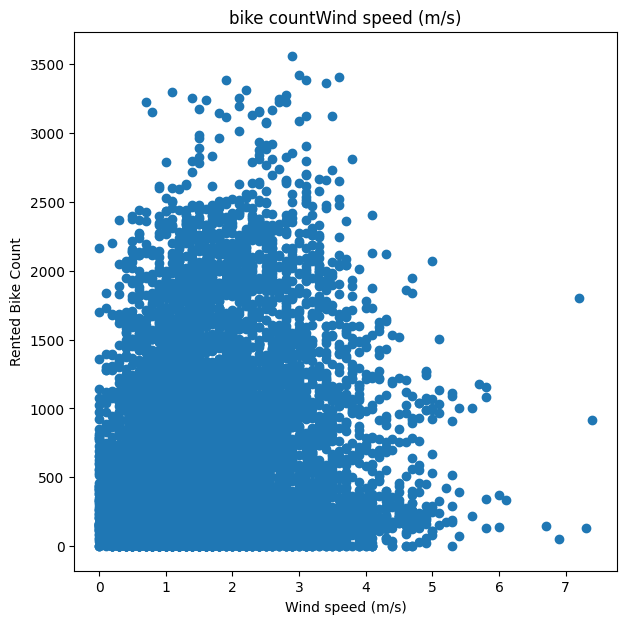

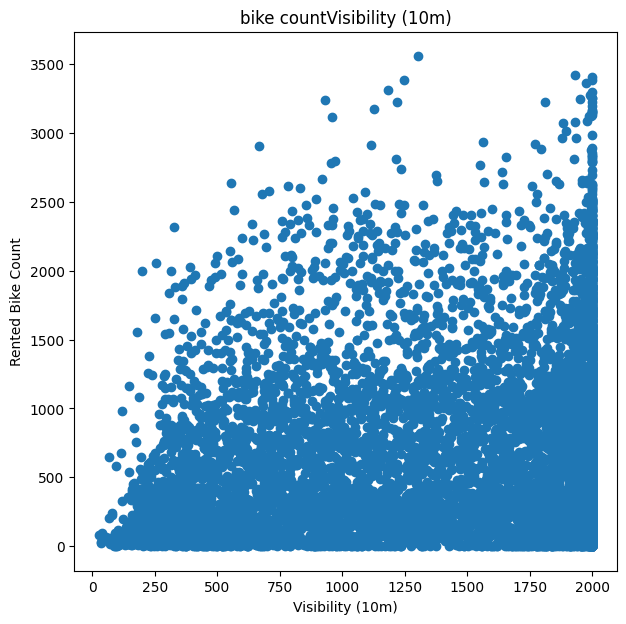

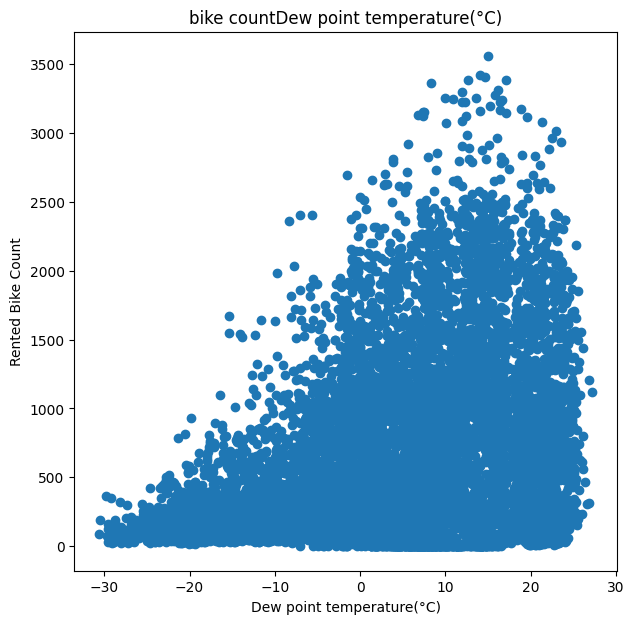

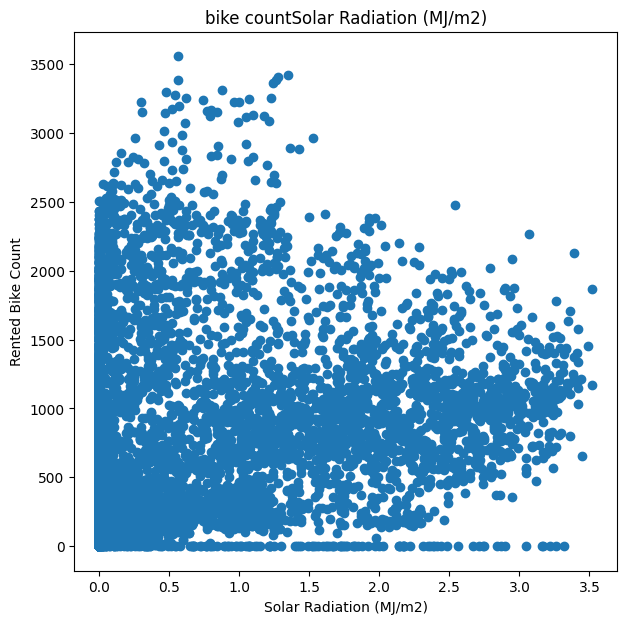

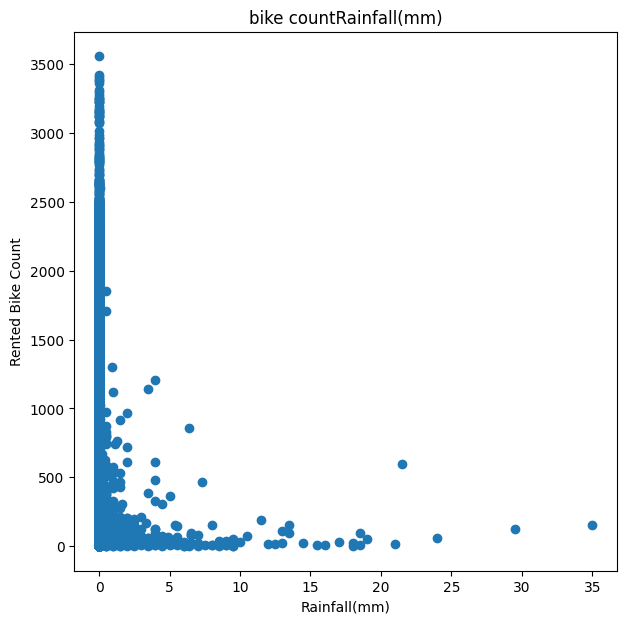

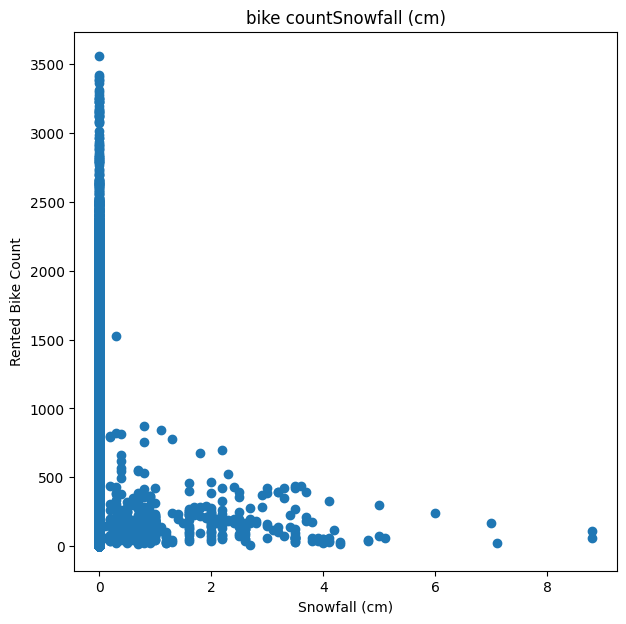

In [ ]:
# Chart - 2 visualization code
variables=dataset.describe().columns
for col in variables[1:-1]:
  plt.figure(figsize=(7,7))
  feature=dataset[col]
  label=dataset['Rented Bike Count']
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)

  plt.ylabel('Rented Bike Count')

  plt.title('bike count'+ col)
  z=np.polyfit(dataset[col],dataset['Rented Bike Count'],1)


plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

I picked up the particular scatter chart for given below various aspects:

1.  in order to clearly have the glimps of bike demand at various hours.

2.  in order to draw comparison easily and understand patterns.

3.  so as to draw meaningful insights by an eye view

4.  to make more understanding of trends.

5.  so as to make data more concluded and explicit.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

zThe insights found from the chart are as follows:

1.  demand is high at 0,8,18,19 hours of the day.

2.  demand is comparitively high in range of temperature15-25 degree celcius

3.  humidity 30-70 show steep bike demand

4.  wind speed1-3 n/s shows high bike demand.

5.  for more visibility ,demand is high

6. lesser the snowfall ,rainfall,solar radiation,more the rented bike demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

the positive insights can be drawn from the chart above:
these are as follows:

 hereby our goal is to focus on variables and respective change in bike demands and provide with parameters to make positive business impcat this can be done by keeping and manipulating these:

1.  demand is high at 0,8,18,19 hours of the day.

2.  demand is comparitively high in range of temperature15-25 degree celcius

3.  humidity 30-70 show steep bike demand

4.  wind speed1-3 n/s shows high bike demand.

5.  for more visibility ,demand is high

6. lesser the snowfall ,rainfall,solar radiation,more the rented bike demand.

#### Chart - 3

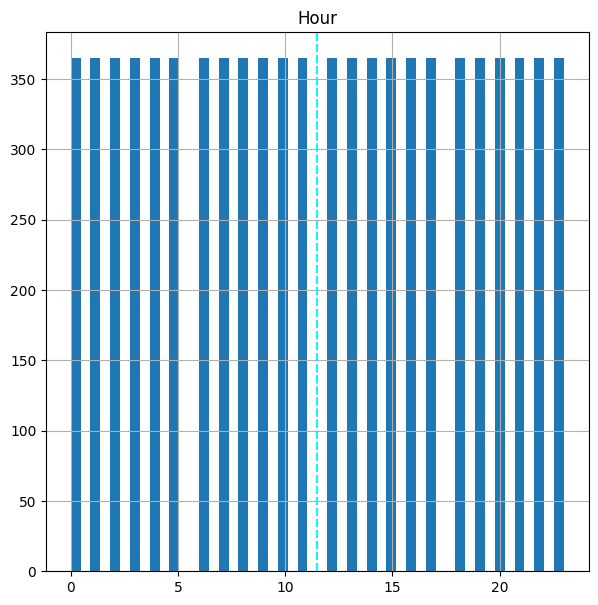

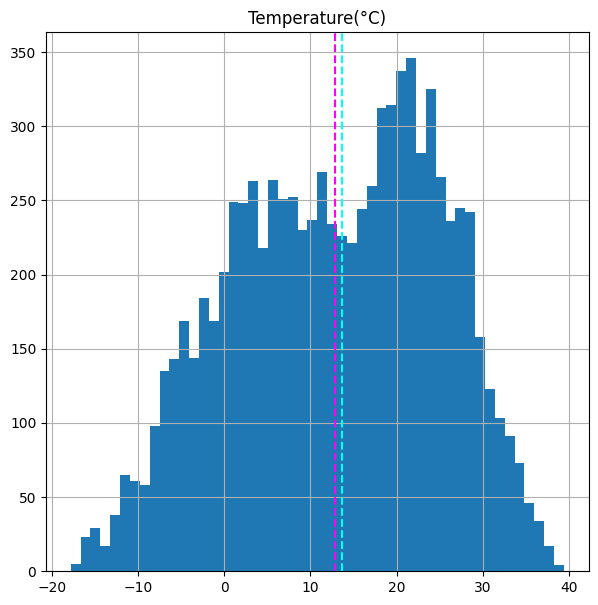

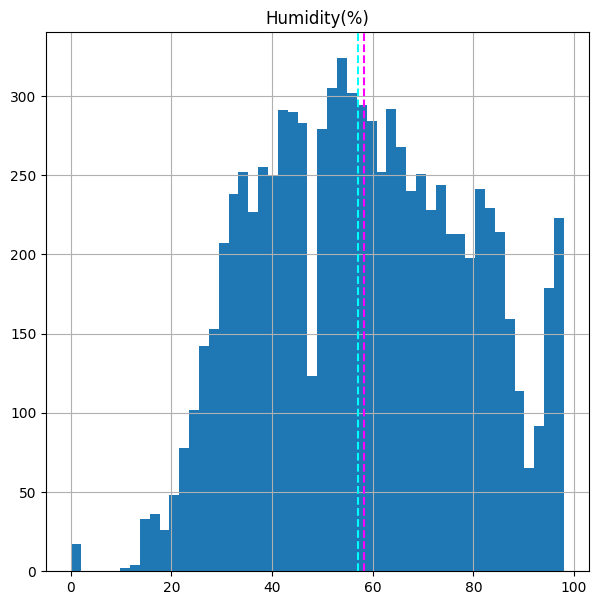

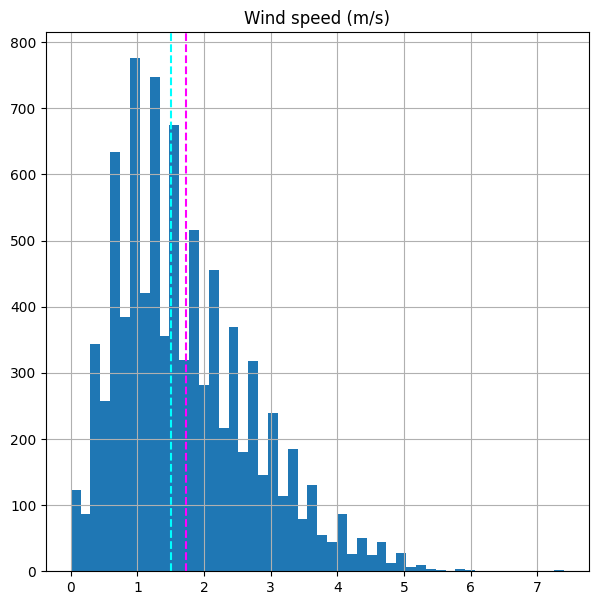

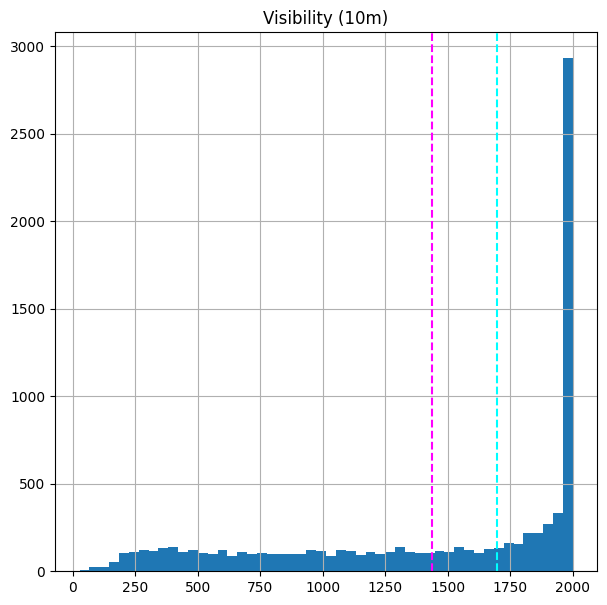

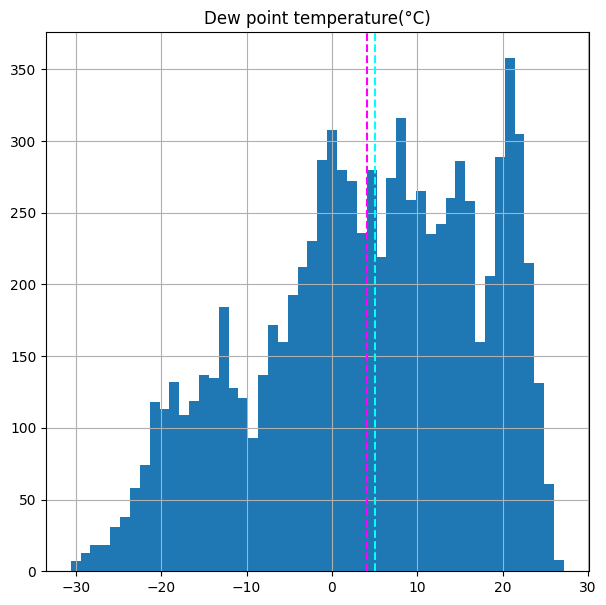

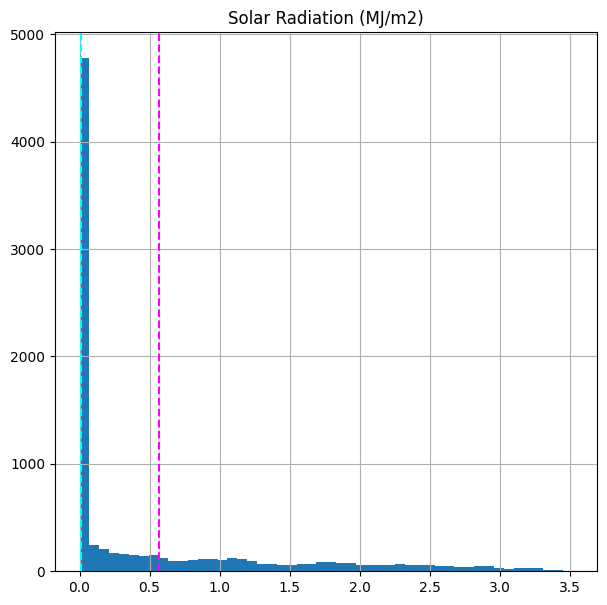

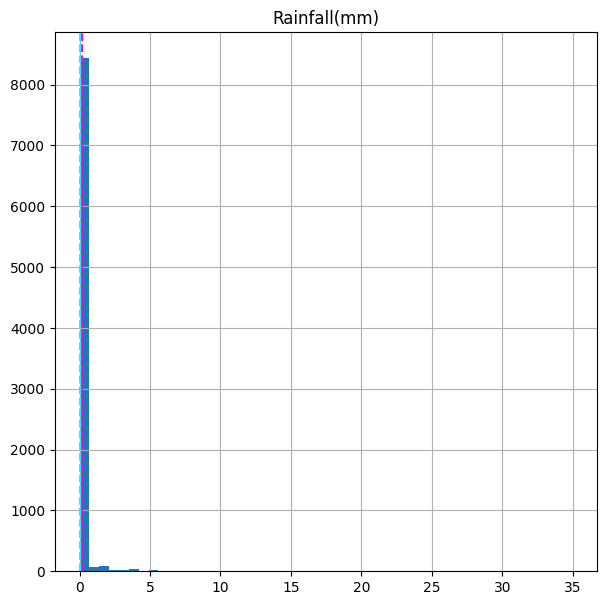

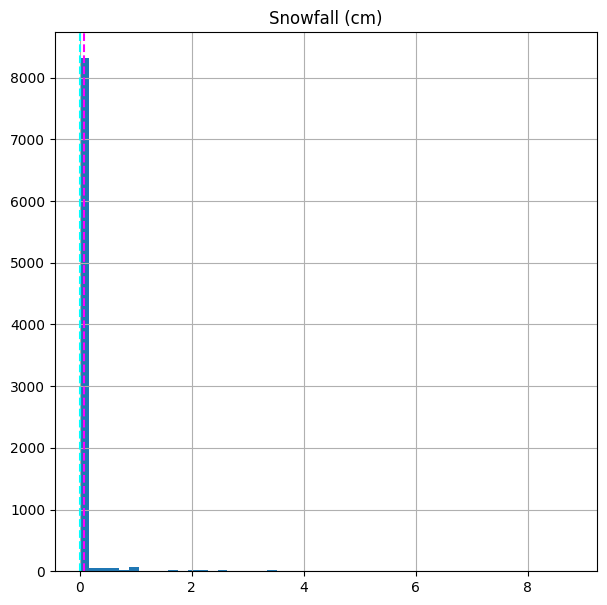

In [ ]:
# Chart - 3 visualization code
for col in variables[1:-1]:
  fig=plt.figure(figsize=(7,7))
  ax=fig.gca()
  feature=dataset[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed')
  ax.axvline(feature.median(),color='cyan',linestyle='dashed')
  ax.set_title(col)



plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked up the particular histogram chart for given below various aspects:

1.  in order to clearly have the glimps of bike demand at various hours.

2.  in order to draw comparison easily and understand patterns.

3.  so as to draw meaningful insights by an eye view

4.  to make more understanding of trends.

5.  so as to make data more concluded and explicit.

##### 2. What is/are the insight(s) found from the chart?

[link text](https://)Answer Here

The insights found from the chart are as follows:

1.  demand is high at 0,8,18,19 hours of the day.

2.  demand is comparitively high in range of temperature15-25 degree celcius

3.  humidity 30-70 show steep bike demand

4.  wind speed1-3 n/s shows high bike demand.

5.  for more visibility ,demand is high

6. lesser the snowfall ,rainfall,solar radiation,more the rented bike demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

the positive insights can be drawn from the chart above:
these are as follows:

 hereby our goal is to focus on variables and respective change in bike demands and provide with parameters to make positive business impcat this can be done by keeping and manipulating these:

1.  demand is high at 0,8,18,19 hours of the day.

2.  demand is comparitively high in range of temperature15-25 degree celcius

3.  humidity 30-70 show steep bike demand

4.  wind speed1-3 n/s shows high bike demand.

5.  for more visibility ,demand is high

6. lesser the snowfall ,rainfall,solar radiation,more the rented bike demand.

#### Chart - 4

Text(0, 0.5, 'counts of bikes')

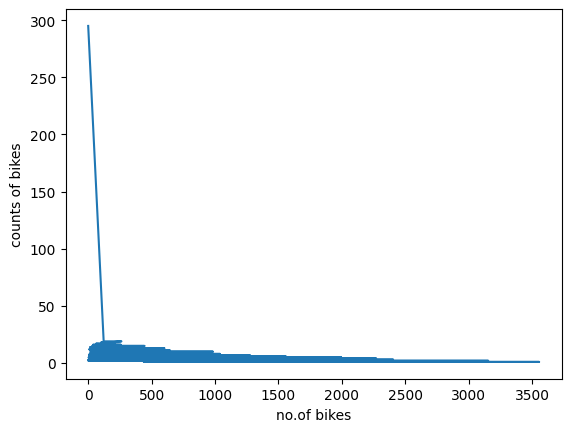

In [ ]:
# Chart - 4 visualization code

mydf=dataset['Rented Bike Count'].value_counts()
plt.plot(mydf)
plt.xlabel('no.of bikes')
plt.ylabel('counts of bikes')

##### 1. Why did you pick the specific chart?

Answer Here.

I picked up the particular line chart for given below various aspects:

1.  in order to clearly have the glimps of bike demand at various hours.

2.  in order to draw comparison easily and understand patterns.

3.  so as to draw meaningful insights by an eye view

4.  to make more understanding of trends.

5.  so as to make data more concluded and explicit.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insights found from the chart are as follows:

1. here the approx200-500 no.of bikes are in greatest frequency.

2.  hereby the demand of rented bikes

3.  there are various trends of demand in the chart.

4.  0-1000 bikes demand is most frequent

5.  1000-2000 bikes are somehow mediocre in demand

6.  2000-3000 are less in demand

7.  3000-4000 are too invisible and are rarely occured.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The positive insights drawn from the chart can be explained in the following manner:

1.  the most of the demand lies between500-1500,so it should be kept in mind and pervaisive availabilty should be there.

2.  the demand is very rare in3000-4000 range ,so the outliers can be kept aside .

3.  the most frequent demand of bikes should be most frequent availability of bikes.


4.  decisions on future should be made keeping in mind the demand supply

#### Chart - 5

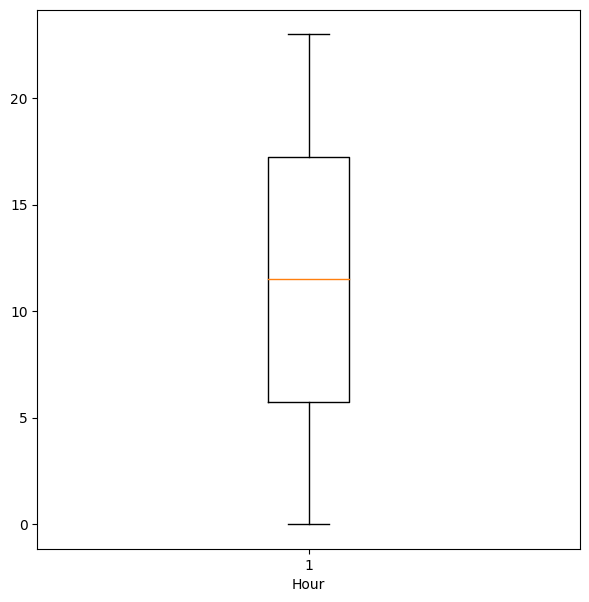

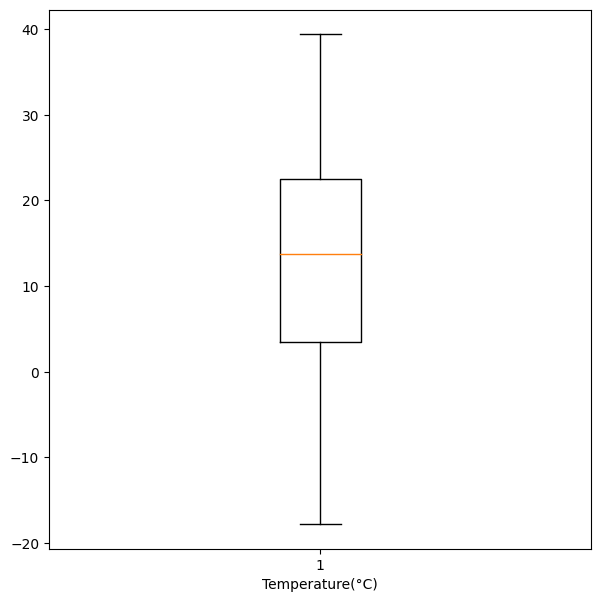

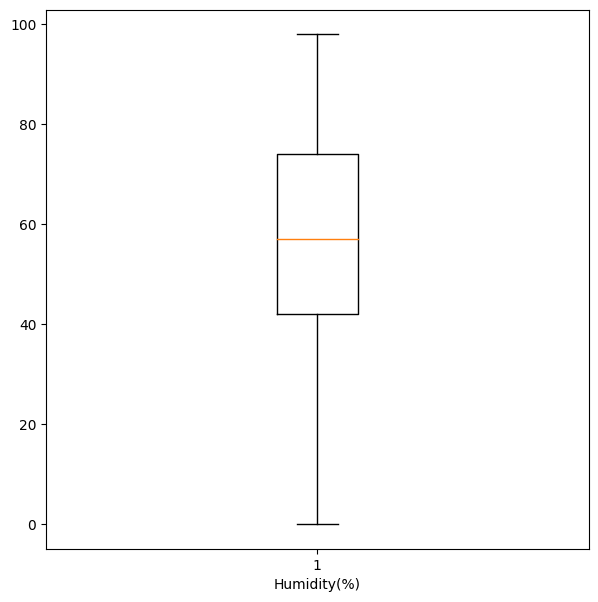

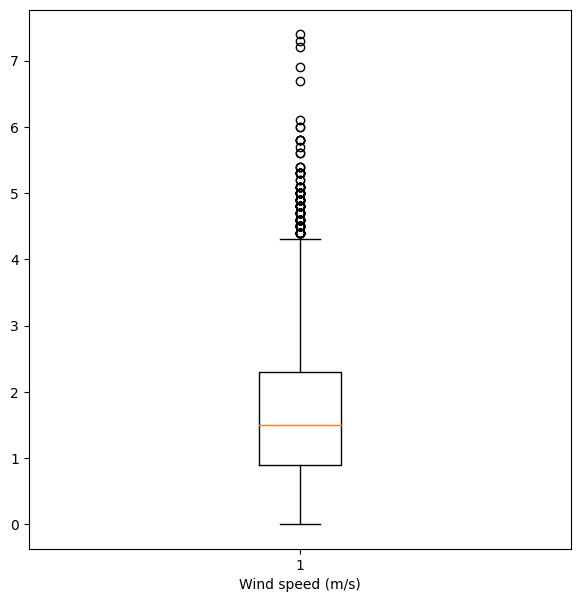

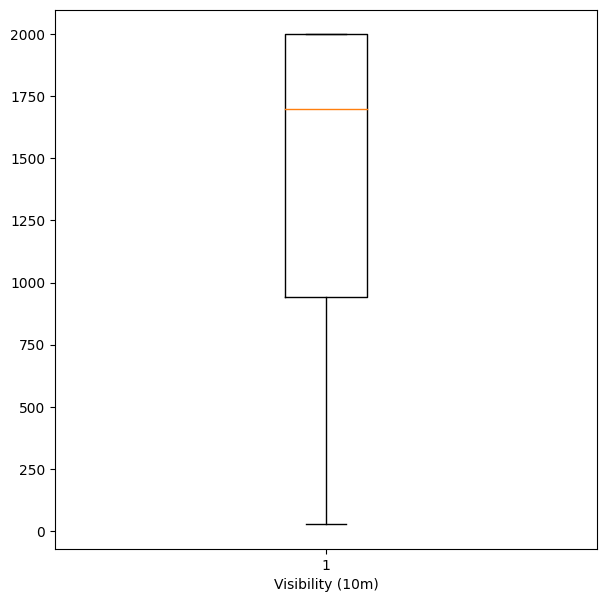

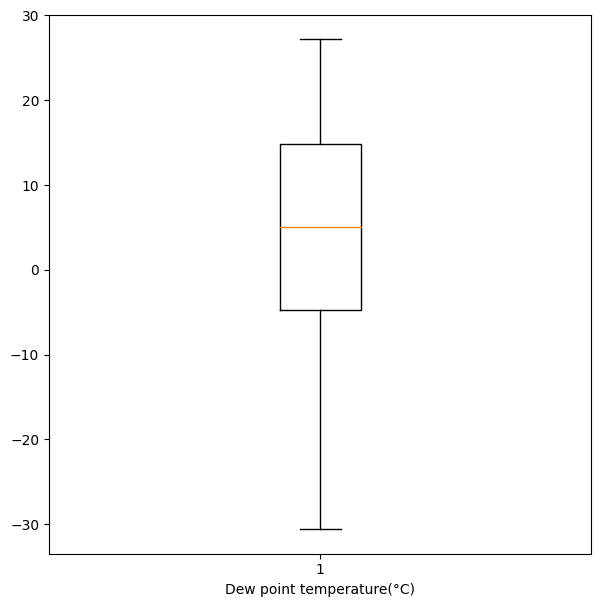

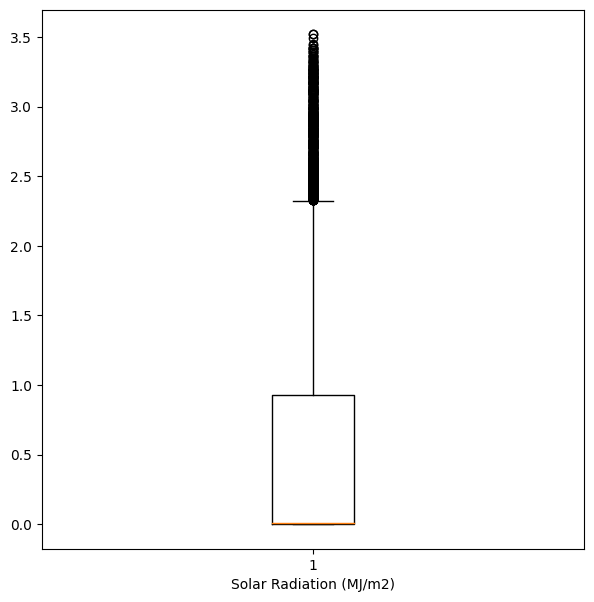

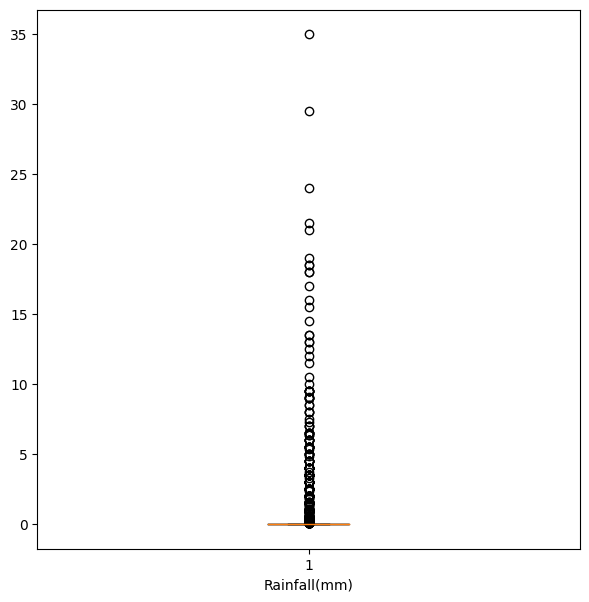

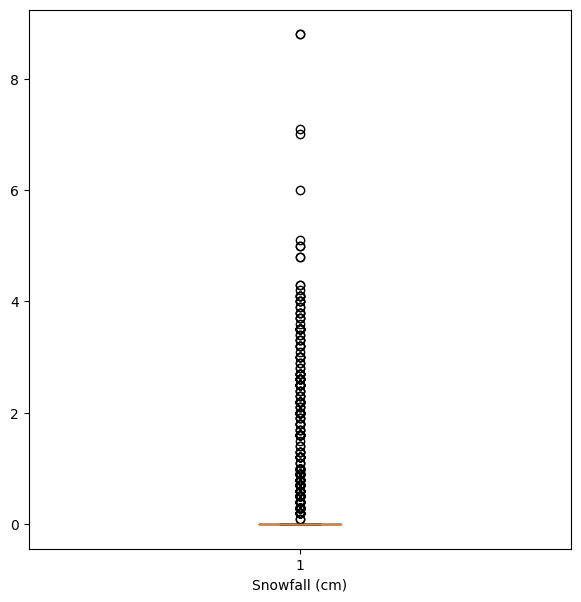

In [ ]:
# Chart - 5 visualization code
variables=dataset.describe().columns
for col in variables[1:-1]:
  plt.figure(figsize=(7,7))
  feature=dataset[col]
  label=dataset['Rented Bike Count']
  plt.boxplot(x=feature)
  plt.xlabel(col)


plt.show()


1. Why did you pick the specific chart?

*Answer* Here.

I picked up the particular box chart for given below various aspects:

1.  in order to clearly have the glimps of frequent and mean values in variables
2.  in order to draw comparison easily and understand patterns.

3.  so as to draw meaningful insights by an eye view

4.  to make more understanding of trends.

5.  so as to make data more concluded and explicit.

2. What is/are the insight(s) found from the chart?

the given box plot help us to understand the common place and anomal values of variables which impact our dependent variables.:

1. 5-15 hours are our most frequent hours ,rest all outliers.

2.  7-23 degree celcius is our normal temperature in which bike are rented commonly.

3.  40-70 is our common humidity.

4.  average wind sped is 1-2

5.  visibility is 800-2000

6.  solar radiation is 0.0-1.0 is most commin

7.  snowfall and rainfall are not significant

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.




the positive insights can be drawn from the chart above:
these are as follows:

 hereby our goal is to focus on variables and respective change in bike demands and provide with parameters to make positive business impcat this can be done by keeping and manipulating these:

1.  demand is high at 0,8,18,19 hours of the day.

2.  demand is comparitively high in range of temperature15-25 degree celcius

3.  humidity 30-70 show steep bike demand

4.  wind speed1-3 n/s shows high bike demand.

5.  for more visibility ,demand is high

6. lesser the snowfall ,rainfall,solar radiation,more the rented bike demand.



#### Chart - 14 - Correlation Heatmap

<ipython-input-79-a65e59b12e61>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=dataset.corr()


<Axes: >

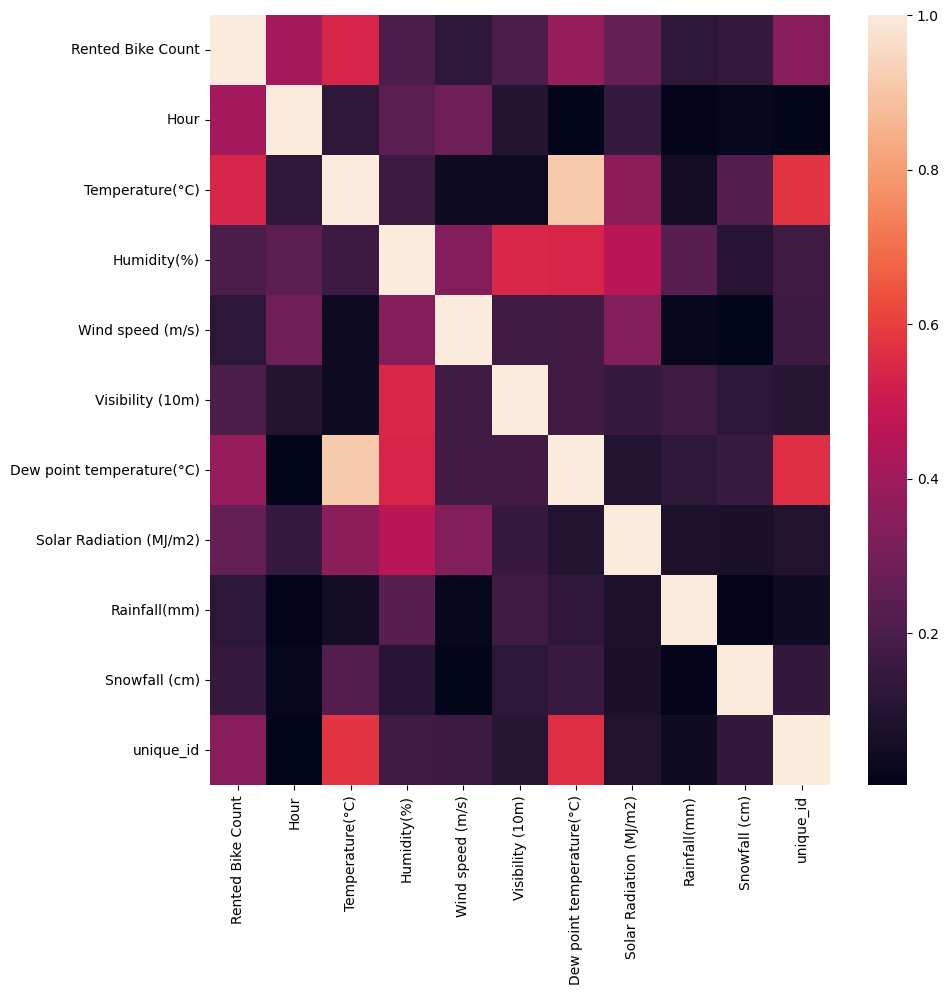

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,10))
correlation=dataset.corr()
sns.heatmap(abs(correlation))

##### 1. Why did you pick the specific chart?

Answer Here.

I picked up the particular heatmap for given below various aspects:

1.  in order to clearly have the glimps of bike demand at various hours.

2.  in order to draw comparison easily and understand patterns.

3.  so as to draw meaningful insights by an eye view

4.  to make more understanding of trends.

5.  so as to make data more concluded and explicit.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insights found from the chart are as follows:

1.  temperature is correlated to mediocre degree to rented bijes demand.

2.  humidity is corelated to visibility and solar radiation.

3.  rest most of the variables show little or no dependency .

4. hereby keeping in mind the variables we can try to manipulate each other from business prospect.

#### Chart - 15 - Pair Plot

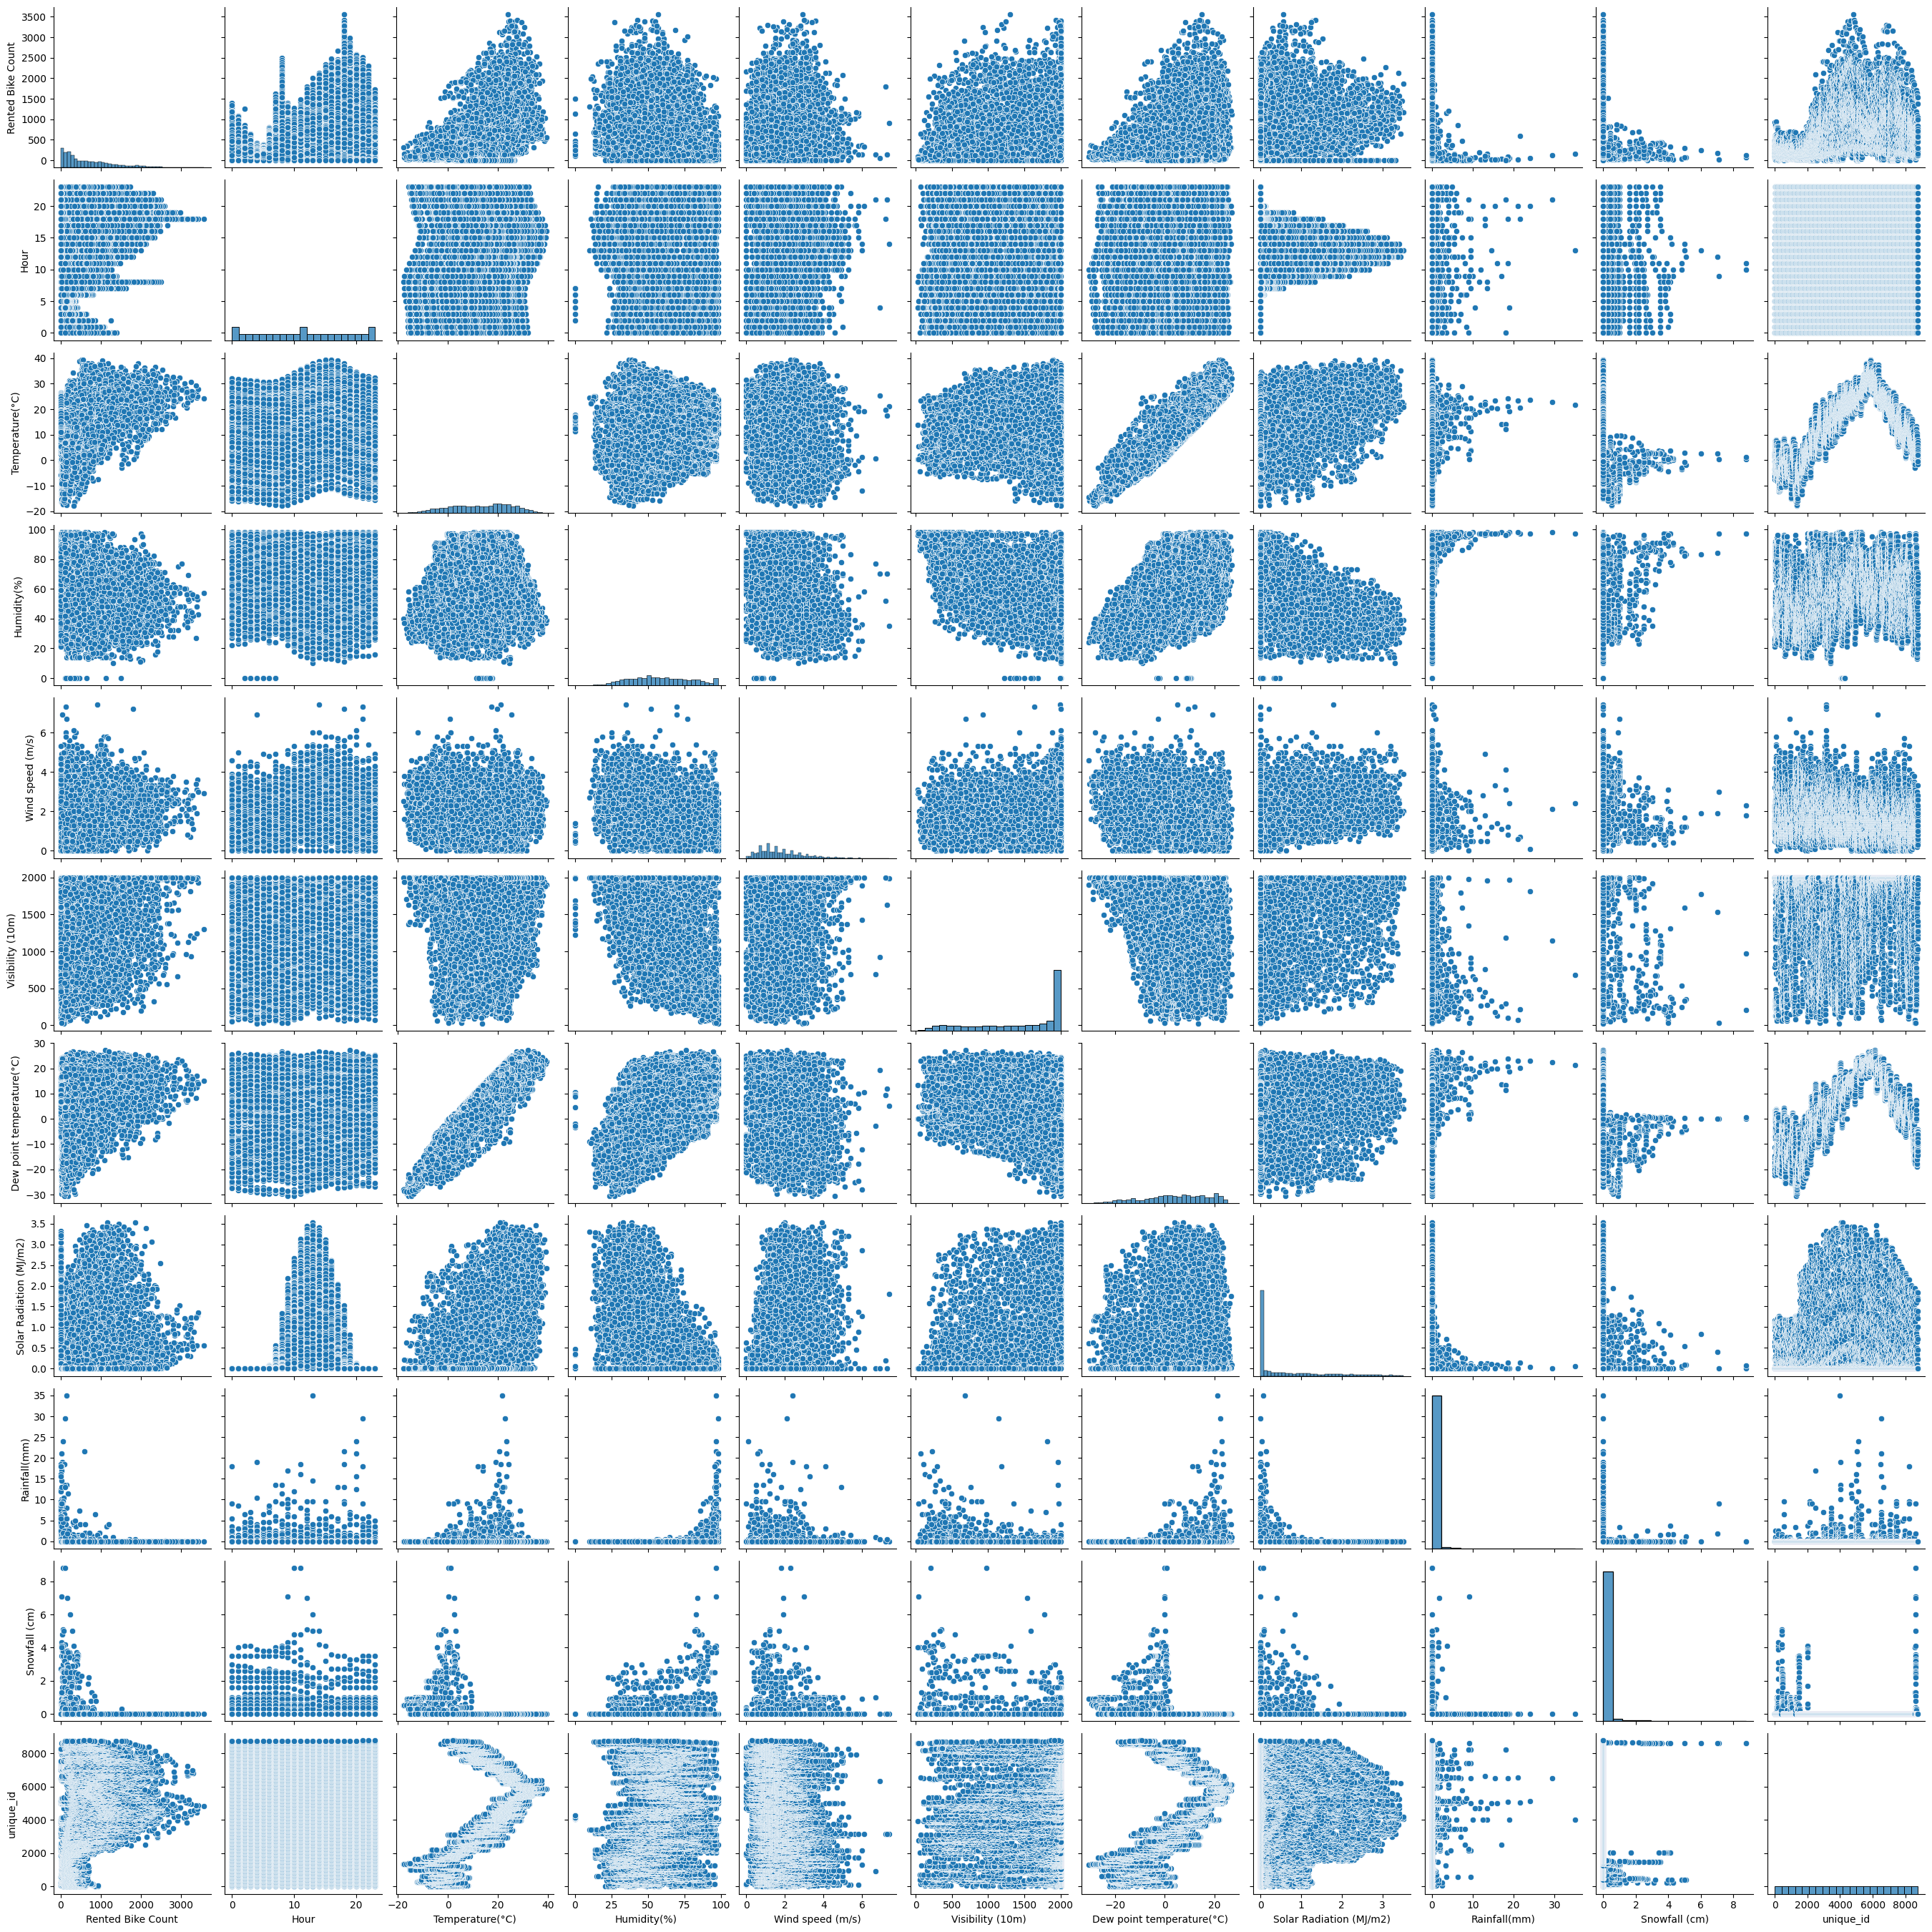

In [ ]:
# Pair Plot visualization code

sns.pairplot(dataset)

##### 1. Why did you pick the specific chart?

Answer Here.

I picked up the particular pair plot chart for given below various aspects:

1.  in order to clearly have the glimps of bike demand at various hours.

2.  in order to draw comparison easily and understand patterns.

3.  so as to draw meaningful insights by an eye view

4.  to make more understanding of trends.

5.  so as to make data more concluded and explicit.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insights found from the chart are as follows:

1.  temperature is correlated to mediocre degree to rented bijes demand.

2.  humidity is corelated to visibility and solar radiation.

3.  rest most of the variables show little or no dependency .

4. hereby keeping in mind the variables we can try to manipulate each other from business prospect.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
unique_id                    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

there are no missing values ,so did nothing ,but wrote code to see missing values if any

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

from scipy import stats
import numpy as np

#dataset[(dataset['Temperature(°C)']>-10)&(dataset['Humidity(%)']>30)&(dataset['Visibility (10m)']>1000)&(dataset['Wind speed (m/s)']<3)&(dataset['Solar Radiation (MJ/m2)']<1)&(dataset['Dew point temperature(°C)']<25)]

##### What all outlier treatment techniques have you used and why did you use those techniques?


Answer Here.

THE TECHNIQUE I USED FOR REMOVING OUTLIERS INVOLVES FOLLOWING STEPS:

1.  FIRST WE HAVE ALREADY MADE BOXPLOT AND HISTOGRAM IN CHARTS FROM WHERE WE GET TO KNOW ALL COMMON RANGE AND OUTLIERS

2.  NOW WE HAVE MADE NEW DATASET TO INCLUDE ALL VARIABLES BY USING FLITERS

3. THIS TECHNIQUE IS SOMEHOW SIMPLE AND EASY TO USE.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
print(dataset['Seasons'].value_counts())

print(dataset['Holiday'].value_counts())

print(dataset['Functioning Day'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [ ]:
#encode

encoding={'Seasons':{'Autumn':1,'Winter':2,'Spring':3,'Summer':4},'Holiday':{'No Holiday':1,'Holiday':2},'Functioning Day':{'Yes':1,'No':2}}


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

firstly ,i have created a copy of my dataset in order to encode categorical variables to numeric.

tgen we have make a code where by we haveassigned the numercic values to each category of categorical data

then we have replaced the values


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

dataset['Demand']=dataset['Rented Bike Count'].apply(lambda x : 'low' if x < 400 else ('mediocre' if 400<= x < 800 else 'high'))

In [ ]:
#removing multicollinearity
dataset.get('Temperature(°C)')
dataset['overall temp']=0.5*dataset['Temperature(°C)'] + 0.5*dataset['Dew point temperature(°C)']
dataset.drop(['Temperature(°C)','Dew point temperature(°C)'],inplace=True,axis=1)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<ipython-input-87-ae5dcaf557d6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr('pearson')


<Axes: >

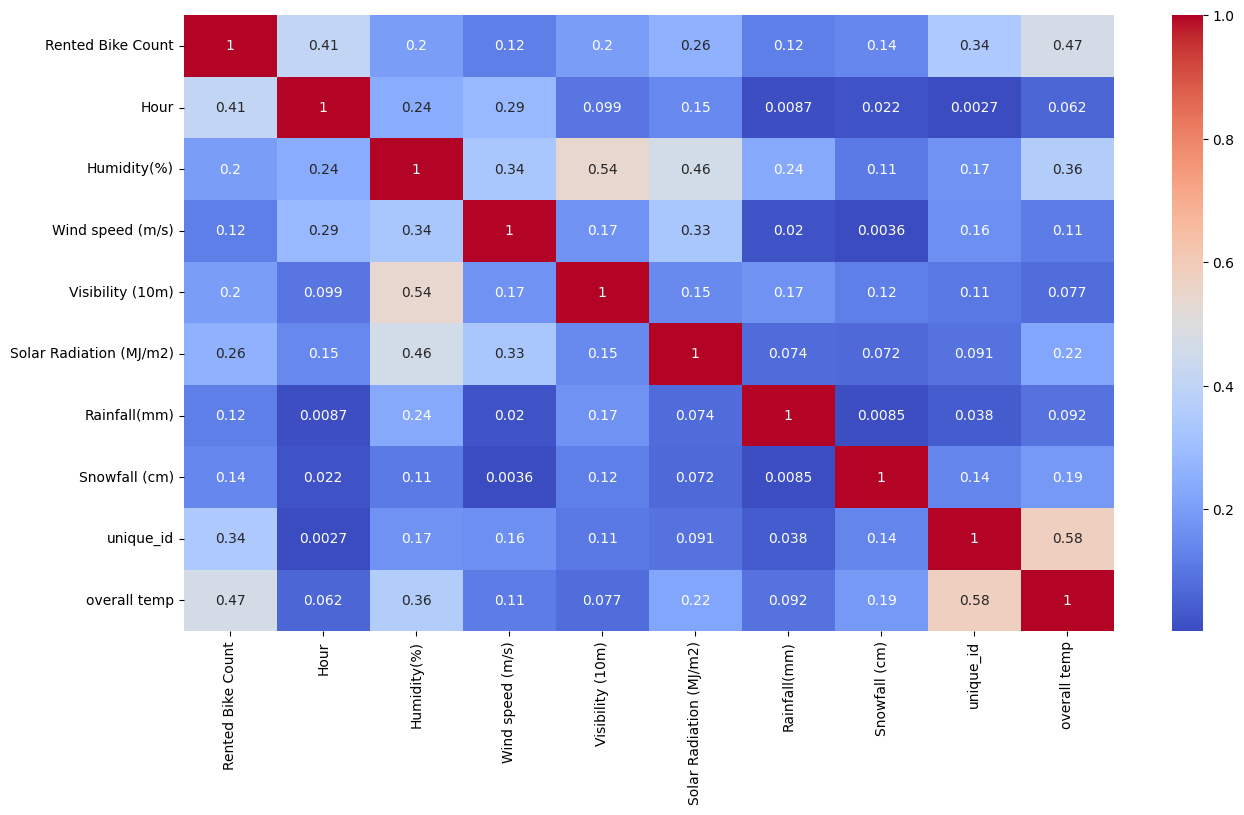

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr('pearson')
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
dataset['visibility and humidity']=0.5*dataset['Humidity(%)']+0.5*dataset['Visibility (10m)']

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

dataset['Demand']=dataset['Rented Bike Count'].apply(lambda x : 'low' if x < 400 else ('mediocre' if 400<= x < 800 else 'high'))
dataset.drop(['Humidity(%)','Visibility (10m)'],inplace=True,axis=1)

#### 2. Feature Selection

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented_Bike_Count','Hour','unique_id']]])

variables       VIF
0        Rented Bike Count  3.185854
1         Wind speed (m/s)  3.751939
2  Solar Radiation (MJ/m2)  1.766376
3             Rainfall(mm)  1.066162
4            Snowfall (cm)  1.043189
5             overall temp  2.027903
6  visibility and humidity  3.884035

In [ ]:
# Select your features wisely to avoid overfitting
numerical_features=['Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','overall temp','visibility and humidity']


In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'unique_id', 'Demand', 'overall temp',
       'visibility and humidity'],
      dtype='object')

In [ ]:
dataset_copy=dataset.copy()

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"Seasons":{"Summer":1,"Winter":0,"Spring":2,"Autumn":3},
                 "Holiday":{"Holiday": 0, "No Holiday": 1},"Functioning Day":{"Yes":0,"No":1}
                  }
dataset_copy=dataset_copy.replace(encoders_nums)

In [ ]:
dataset_copy.head()

Date  Rented Bike Count  Hour  Wind speed (m/s)  \
0  01/12/2017                254     0               2.2   
1  01/12/2017                204     1               0.8   
2  01/12/2017                173     2               1.0   
3  01/12/2017                107     3               0.9   
4  01/12/2017                 78     4               2.3   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                      0.0           0.0            0.0        0        1   
1                      0.0           0.0            0.0        0        1   
2                      0.0           0.0            0.0        0        1   
3                      0.0           0.0            0.0        0        1   
4                      0.0           0.0            0.0        0        1   

   Functioning Day  unique_id Demand  overall temp  visibility and humidity  
0                0          1    low        -11.40                   1018.5  
1                0          2    low        -11.55                   1019.0  
2                0          3    low        -11.85                   1019.5  
3                0          4    low        -11.90                   1020.0  
4                0          5    low        -12.30                   1018.0

In [ ]:
features = numerical_features.copy()
features.extend(['Seasons','Holiday','Functioning Day'])

In [ ]:
features

['Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'overall temp',
 'visibility and humidity',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [ ]:
dataset_copy.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'unique_id', 'Demand', 'overall temp',
       'visibility and humidity'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

hereby firstly i have selected the important numerical features of my dataset to work upon :

hereby i have excluded the categorical features already .

also i have combined the temperature and excluded twice varaibles to avoid mulricollinearity.

##### Which all features you found important and why?

Answer Here.

The important features according to me are:

1.'Rented Bike Count', 'Hour','Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)','overall_temperature'
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

as they all are important in drawing the conclusions about my prediction .they all are numerical data at all and contains important aspect



### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
dataset_copy.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'unique_id', 'Demand', 'overall temp',
       'visibility and humidity'],
      dtype='object')

##### Which method have you used to scale you data and why?

I have used minmaxscaler because:

1.  for having a light touch in our dataset

2.  as minmaxscaler is non-distorting.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

features=numerical_features.copy()
features.extend(['Seasons','Holiday','Functioning Day'])
features

['Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'overall temp',
 'visibility and humidity',
 'Seasons',
 'Holiday',
 'Functioning Day']

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

i have used feature selection technique to fliter the variables i need:

it facilitates the working on dataset

it concentrate the focus on important things.

it helps i prediaction very well

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

dataset_copy.replace([np.inf, -np.inf],np.nan,inplace=True)
dataset_copy.fillna(0,inplace=True)
dataset_copy['Rented Bike Count']=dataset_copy['Rented Bike Count'].astype(int)
from scipy.stats import zscore
#Train test split
#dataset_copy['Rented Bike Count'].astype(np.float64)
X = dataset_copy[features].apply(zscore)
y = np.cbrt(dataset_copy['Rented Bike Count'])

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)


(7008, 9)
(1752, 9)


##### What data splitting ratio have you used and why?

Answer Here.

i have used the ratio 8:2 for train ans test datasetas:

i think the dataset is much divergent so there is need to ⁉


  :make sure it does not underfit


  :to provide better space for understanding

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)

print(reg.score(X_train, y_train))

reg.coef_

reg.intercept_

# Predict on the model
y_pred = reg.predict(X_test)

y_pred

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

0.574927480380893
MSE : 4.239454830906751
RMSE : 2.0589936451836732


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)

R2 : 0.5731189509249419


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[]

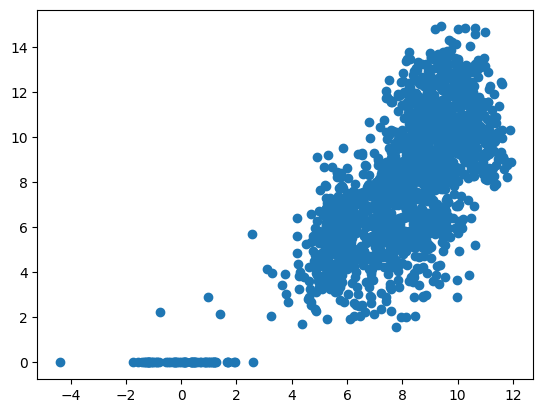

In [ ]:
#visualiazation
plt.scatter(y_pred,y_test)
plt.plot()

#### 2. model-2

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.5749274726744552

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
y_pred_lasso = lasso_regressor.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.383e+02, tolerance: 5.350e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+02, tolerance: 5.371e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.384e+03, tolerance: 5.342e

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -4.074054673013113


In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)

MSE : 4.239548730847079
RMSE : 2.0590164474445265
R2 : 0.5731094959108813


[]

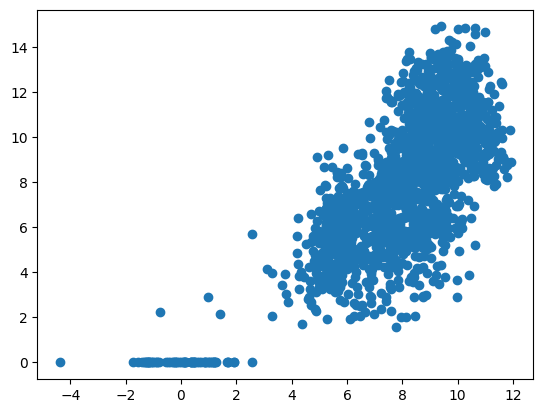

In [ ]:
plt.scatter(y_pred_lasso,y_test)
plt.plot()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

i have used gridsearchCV here because:


it tries all the combinations of values passed

evaluates the model for each combination using cross-validation method.

we get accuracy/loss for every combination of hyperparameters

we can choose one with best performance



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

basically models are somehow the same ,no as such improvement can be seen




#model-3

In [ ]:
# Importing modules that are required

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge



# Creating and training model
model = BayesianRidge()
model.fit(X_train, y_train)

# Model making a prediction on test data
prediction = model.predict(X_test)

# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")


r2 Score Of Test Set : 0.5731230414061781


In [ ]:
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)

MSE : 4.239454830906751
RMSE : 2.0589936451836732


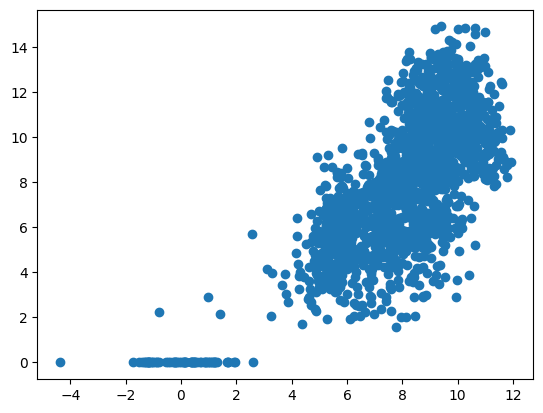

In [ ]:
plt.scatter(prediction,y_test)

plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

i have used accuracy as my evaluation metrices as:

it gives the accuracy point and help us understand our model

it provies space dor further work



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.


i will choose linear regression model as my final prediaction model as:

it has better acuracy

it has small error

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

here by i have used linear regression and random forest ,my aimin doing it was to:

prepare a more visible and better model

to make more understanding out of it

to design accurate model

hereby i have chosen importatnt features in my model with small vif

# **Conclusion**

Write the conclusion here.

Hereby we can conclude the following points by working on our dataset :

1.There is positive degree correlation of some extent in temperature and dew point temperature.

2.There is positive degree correlation of some extent in  rainfall and visibility.

3.hereby we are to prepare a model which predicts independent variables to some accuracy.

4.no. of hours and temperature had a great impact on dependent variable hereby rented bike count.

5.here no. of hours is something in our hand so we can adjust it in some ways or other for rented bike count.

6.rented bike count has almost no correlation with wind speed.

7.our models give us a good level of accuracy here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***